<a href="https://colab.research.google.com/github/Atown16/CAP2751/blob/main/CAP2751_Assignment1_TRIGG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CAP 2751 - Tools for Data Science
***Include the following info by clicking here:***
* Name: Austin Trigg
* Canvas Course Section: CAP2751-2
* Date: 02/05/2025
* Link to your Notebook: https://colab.research.google.com/drive/1qgtqJbykRFJqunLo8e9ijU_lZo-pWW3l?usp=sharing

# Assignment 1: Exploratory Data Analysis (EDA)
## STARTER

### Goals

- To acquire a basic understanding of the Python "data science stack" (NumPy, Pandas, Matplotlib).
- To have an early experience of manipulating, summarizing, and visualizing small datasets.
- To demonstrate the ability to write Python code to answer questions and test hypotheses based on the contents of those datasets.


### Instructions

- This assignment is structured in two parts.
- For each part, there will be some Python code to be written and questions to be answered.
- At the end, you should export your notebook to PDF format; it will "automagically" become your report.
- Submit the report (PDF), notebook (.ipynb file), and the link to the "live" version of your solution on Google Colaboratory via Canvas.
- The number of points is indicated next to each part. They add up to 100.
- There are additional (20 points worth of) bonus items, which are, of course optional.

### Important

- It is OK to attempt the bonus points, but please **do not overdo it!**
- Remember: this is an early exercise in exploring datasets; learning the syntax and "tricks" of Python, Jupyter notebooks, Numpy, Pandas, and Matplotlib; and writing code to test simple hypotheses and produce answers to simple questions that **you know you should be able to answer** because the answer can be pulled from the data.
- This is not (yet) the time to do sophisticated statistical analysis, train ML models, etc.

---------
### Imports + Google Drive

In [ ]:
# Imports
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from __future__ import division
import seaborn as sns
sns.set(style='ticks', palette='Set2')
%matplotlib inline


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


-------------------
## Part 1: Salaries

The Python code below will load a dataset containing the salaries and demographic data of more than 1000 employees of a hypothetical company, available in the file *salaries.csv*, which is a simple comma-separated list of labels and values.

In [ ]:
salaries = pd.read_csv('/content/drive/My Drive/Colab Notebooks/data/salaries.csv')
#salaries = pd.read_csv('./data/salaries.csv')
print(salaries.shape)
print(salaries.count())

(1192, 6)
earn      1192
height    1192
sex       1192
ed        1192
age       1192
race      1192
dtype: int64


In [ ]:
#How many samples we have:
rows, columns = salaries.shape
print("The dataset has {:,} rows and {} columns".format(rows, columns))

#Column names of the dataframes:
print(salaries.columns)


The dataset has 1,192 rows and 6 columns
Index(['earn', 'height', 'sex', 'ed', 'age', 'race'], dtype='object')


In [ ]:
#print(salaries.info()) and useful to debug and check if in this case "salaries" is a dataframe
print(type(salaries))

<class 'pandas.core.frame.DataFrame'>


In [ ]:
#This prints the data type of the value in the first row ([0]) of the 'race' column
#This prints the value of the race attribute in the row with index 110 in the 'race' column
print("race data type", type(salaries['race'][0]))
print("race value", salaries['race'][110])



race data type <class 'str'>
race value white


### 1.1 Your turn! (2 points)

What is the meaning of each of the six variables/features stored along the columns of the dataset?

Hint: Your solution should have a code cell (2-3 lines of Python) + a text cell (bullet list, explaining the meaning of each variable _to the best of your knowledge_)

In [ ]:
# Enter your code here
salaries.head()

,earn,height,sex,ed,age,race
0,50000.0,74.424439,male,16,45,white
1,60000.0,65.537543,female,16,58,white
2,30000.0,63.629198,female,16,29,white
3,50000.0,63.108562,female,16,91,other
4,51000.0,63.402484,female,17,39,white


In [ ]:
# Enter your code here
print(salaries.isnull().sum())

earn      0
height    0
sex       0
ed        0
age       0
race      0
dtype: int64




*   earn: is the annual salary
*   height: is the hieght in inches, the # of digits shows that it was converted from the metric system
*   sex: is a categorical value
*   ed: is the # of education years
*   age: is a complete # of years of age
*   race: is a categorical value








In [ ]:
# Enter your code
# inspired by ----- url
#print(salaries.isnull().sum() )
print(salaries.dtypes)


earn      float64
height    float64
sex        object
ed          int64
age         int64
race       object
dtype: object


In [ ]:
salaries.describe()

,earn,height,ed,age
count,1192.000000,1192.000000,1192.000000,1192.000000
mean,23154.773490,66.915154,13.504195,41.378356
std,19472.296925,3.853968,2.420175,15.867428
min,200.000000,57.503219,3.000000,18.000000
25%,10000.000000,64.009746,12.000000,29.000000
50%,20000.000000,66.451265,13.000000,38.000000
75%,30000.000000,69.848100,16.000000,51.000000
max,200000.000000,77.051282,18.000000,91.000000


* **bold text**Enter your text here*

*   earn = salary (presumably annual, in USD)
*   height = height (inch)





--------------------
### Summary statistics and correlations

Let's explore the dataset by plotting some graphs and displaying summary statistics.

The code below should display:
- Min, max, average, and median salary (global)
- A histogram of salaries
- A scatterplot correlating salaries and years of education
- The (Pearson) correlation coefficient between the two variables.

This should help us get started.

In [ ]:
salary = np.array(salaries['earn'])
print("--- Salary statistics ---")
print("Minimum salary (global): ${:6.2f}".format(np.min(salary)))
print("Maximum salary (global): ${:6.2f}".format(np.max(salary)))
print("Average salary (global): ${:6.2f}".format(np.mean(salary)))
print("Median  salary (global): ${:6.2f}".format(np.median(salary)))

--- Salary statistics ---
Minimum salary (global): $200.00
Maximum salary (global): $200000.00
Average salary (global): $23154.77
Median  salary (global): $20000.00


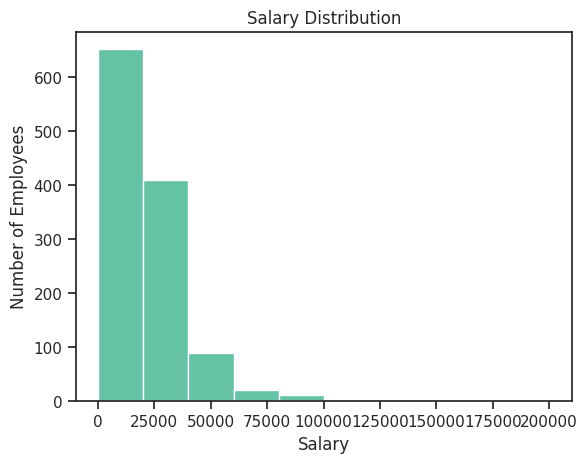

In [ ]:
plt.hist(salary)
plt.title('Salary Distribution')
plt.xlabel('Salary')
plt.ylabel('Number of Employees');

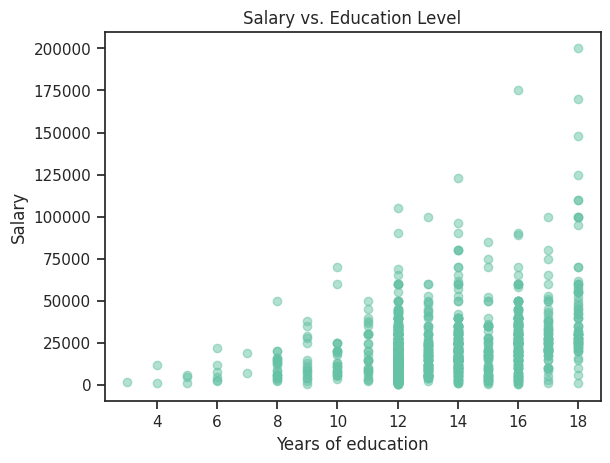

In [ ]:
years = np.array(salaries['ed'])
plt.title('Salary vs. Education Level')
plt.ylabel('Salary')
plt.xlabel('Years of education');
plt.scatter(years, salary, alpha=0.5)
plt.show()

In [ ]:
# Compute Pearson coefficient
corr, _ = pearsonr(salary,years)
print('Correlation coefficient: ',corr)

Correlation coefficient:  0.3399765246894847


The Pearson correlation coefficient (a value between -1 and 1) can be used to summarize the strength of the linear relationship between two data samples.

A simplified way to interpret the result is:
- A value of 0 means no correlation
- Values below -0.5 or above 0.5 indicates a notable (negative/positive) correlation

### 1.2 Your turn! (10-14 points)

Write code to:

1. Display the total headcount and the number (and %) of male and female employees. (2 pts)
2. Compute and display the min, max, average, and median salary *per gender*. (8 pts)
3. (OPTIONAL) Plot meaningful graphs that could provide insight into the gender inequality (*if any is present*) associated with the salaries in the company. (<= 4 bonus points)


In [ ]:
# 1. Display the total headcount and the number (and %) of male and female employees. (2 pts)


salaries = pd.DataFrame({
    'sex': ['male', 'female', 'male', 'female', 'male', 'male', 'female']
})

# finds the total # of employees in our data
total_headcount = len(salaries)  # len() gives us the # of rows in the table

# This line is to count how many times each gender appears in the 'sex' column
gender_counts = salaries['sex'].value_counts()

# Calculate the % of males and females
gender_percentages = (gender_counts / total_headcount) * 100  # This is a simple percentage calculation: (part / whole) * 100


# PRINT RESULTS
print("Total headcount:", total_headcount)
print("Male employees:", gender_counts.get('male', 0), f"({gender_percentages.get('male', 0):.2f}%)")
print("Female employees:", gender_counts.get('female', 0), f"({gender_percentages.get('female', 0):.2f}%)")

Total headcount: 7
Male employees: 4 (57.14%)
Female employees: 3 (42.86%)


In [ ]:
# 2. Compute and display the min, max, average, and median salary per gender. (8 pts)

salaries = pd.read_csv('/content/drive/My Drive/Colab Notebooks/data/salaries.csv')

# 'earn' is the column for salary and 'sex' is the gender column
salary_stats = salaries.groupby('sex')['earn'].agg(['min', 'max', 'mean', 'median'])

# PRINT RESULTS
print(salary_stats)

           min       max          mean   median
sex                                            
female   200.0  123000.0  18280.195051  15000.0
male    1000.0  200000.0  29786.130693  25000.0


*Enter your text here*

--------------------
### Signs of inequality

As you can possibly tell by now, this dataset may help us test hypotheses and answer questions related to possible sources of inequality associated with the salary distribution: gender, age, race, etc..

Let's assume, for the sake of argument, that the number of years of education should correlate well with a person's salary (this is clearly a weak argument and the plot and Pearson correlation coefficient computation above suggests that this is *not* the case) and that other suspiciously high (positive or negative) correlations could be interpreted as a sign of inequality.

---------------------
### Hypotheses H1, H2, H3
At this point, we will formulate 3 different hypotheses that might suggest that the salary distribution is biased by factors such as age, gender, or race:

- H1: Older employees are paid less (i.e., ageism)
- H2: Female employees are paid less (i.e., gender bias)
- H3: Non-whites are paid less (i.e, race bias).

### 1.3 Your turn! (18-26 points)

Write Python code to test hypotheses H1, H2, and H3 (and some text to explain whether they were confirmed or not).

Feel free to (also) use plots, but make your code independent of a human being interpreting those plots.

**Weight**: 18 pts, i.e., 6 pts per hypothesis.
Up to 8 bonus points for insightful additional hypotheses, code, and/or comments.  

In [ ]:
# I included this here to show all the columns im working Although its given.
print(salaries.columns)

Index(['earn', 'height', 'sex', 'ed', 'age', 'race'], dtype='object')


H1:

In [ ]:
# 1. Separate employees into two groups: under 40 and over 40
under_40 = salaries[salaries['age'] <= 40]
over_40 = salaries[salaries['age'] > 40]

# 2. Calculate the average salary for each group
avg_salary_under_40 = under_40['earn'].mean()
avg_salary_over_40 = over_40['earn'].mean()

# 3. Compare and print
print("Average salary for employees under 40:", avg_salary_under_40)
print("Average salary for employees over 40:", avg_salary_over_40)

 # if-else statment included
if avg_salary_under_40 > avg_salary_over_40:
    print("Older employees seem to be paid less on average.")
else:
    print("Older employees don't seem to be paid less on average.")

Average salary for employees under 40: 21277.424332344213
Average salary for employees over 40: 25597.50193050193
Older employees don't seem to be paid less on average.


H2:

In [ ]:
# H2: Female employees are paid less (i.e., gender bias)

salaries.groupby("sex")["earn"].mean()


,earn
sex,
female,18280.195051
male,29786.130693


H3:

In [ ]:
# Enter your code here

# Calculate average salary for white and non-white employees
avg_salary_white = salaries[salaries['race'] == 'white']['earn'].mean() # == equal to
avg_salary_non_white = salaries[salaries['race'] != 'white']['earn'].mean() # =! not equal to

# Print
print(f"Average salary for white employees: ${avg_salary_white:.2f}")
print(f"Average salary for non-white employees: ${avg_salary_non_white:.2f}")

# REMOVE "#" for if else statement
#if avg_salary_white > avg_salary_non_white:
    #print("There is some evidence to suggest non-white employees are paid less.")
#else:
    #print("There is no clear evidence to suggest non-white employees are paid less.")

Average salary for white employees: $23882.47
Average salary for non-white employees: $19609.50


-------------------
## Part 2: Fuel consumption

The Python code below will load a dataset containing fuel consumption data for ~400 vehicles produced in the 1970s and the 1980s along with some characteristic information associated with each model.

Here, *displacement* refers to a vehicle's engine size and the fuel efficiency is measured in miles per gallon (mpg).

See:
https://archive.ics.uci.edu/ml/datasets/Auto+MPG for additional information.

In [ ]:
data = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data-original",
                   delim_whitespace = True, header=None,
                   names = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration',
                            'model', 'origin', 'car_name'])
print(data.shape)

<ipython-input-22-4a6d48b4152a>:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data-original",


(406, 9)


In [ ]:
data.dropna(inplace=True)
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car_name
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0,chevrolet chevelle malibu
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0,buick skylark 320
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0,plymouth satellite
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0,amc rebel sst
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0,ford torino


### 2.1 Your turn! (10-12 points)

Write code to:

1. Count the number of 3- and 5-cylinder vehicles in the dataset, display the count, and discard those entries (rows). (6 pts)
2. Compute and display the min, max, and average fuel consumption (in mpg) for 4-, 6-, and 8-cylinder vehicles. (4 pts)
3. (OPTIONAL) Display the name of the most and least fuel efficient vehicles in the dataset (<= 2 points)


In [ ]:
# 1. Count the number of 3- and 5-cylinder vehicles in the dataset, display the count, and discard those entries (rows). (6 pts)

# Initialize counters
count_3_cylinder = 0
count_5_cylinder = 0

# Loop through the 'cylinders' column
for cylinders in data['cylinders']:
    if cylinders == 3:
        count_3_cylinder += 1  # Add 1 if it's a 3-cylinder car
    elif cylinders == 5:
        count_5_cylinder += 1  # Add 1 if it's a 5-cylinder car

# Print results
print("Number of 3-cylinder vehicles:", count_3_cylinder)
print("Number of 5-cylinder vehicles:", count_5_cylinder)

# Discard entries with 3 or 5 cylinders
filtered_car_data = data[(data['cylinders'] != 3) & (data['cylinders'] != 5)]

print(f"Rows after discarded entries: {len(filtered_car_data)} rows")

Number of 3-cylinder vehicles: 4
Number of 5-cylinder vehicles: 3
Rows after discarded entries: 385 rows


In [ ]:
#2. Compute and display the min, max, and average fuel consumption (in mpg) for 4-, 6-, and 8-cylinder vehicles.

# Group data by number of cylinders and calculate statistics
cyl_stats = data.groupby("cylinders")["mpg"].agg(["min", "max", "mean"])

# display statistics on cylinders
print(cyl_stats.loc[[4, 6, 8]])

            min   max       mean
cylinders                       
4.0        18.0  46.6  29.283920
6.0        15.0  38.0  19.973494
8.0         9.0  26.6  14.963107


In [ ]:
# 3. (OPTIONAL) Display the name of the most and least fuel efficient vehicles in the dataset

# Find the most fuel-efficient vehicle
most_efficient = data.loc[data['mpg'].idxmax()]
most_efficient_name = most_efficient['car_name']

# Find the least fuel-efficient vehicle
least_efficient = data.loc[data['mpg'].idxmin()]
least_efficient_name = least_efficient['car_name']

# Display the results
print(f"Most fuel efficient vehicle: {most_efficient_name} ({most_efficient['mpg']} mpg)")
print(f"Least fuel efficient vehicle: {least_efficient_name} ({least_efficient['mpg']} mpg)")

Most fuel efficient vehicle: mazda glc (46.6 mpg)
Least fuel efficient vehicle: hi 1200d (9.0 mpg)


--------------------
### Hypotheses and questions

This dataset may help us test hypotheses and answer questions related to fuel consumption.

To get started: Which features of a vehicle correlate best with its mpg --  *displacement*, *weight*, or *horsepower*?

### 2.2. Your turn! (24 points)

Write Python code to plot the relationship between (8 pts each):

1. Fuel consumption and displacement (engine size)
2. Fuel consumption and weight
3. Fuel consumption and horsepower (HP)


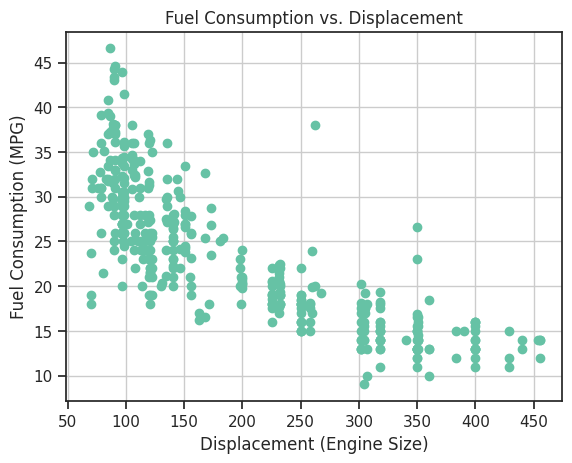

In [ ]:
# 1. Fuel consumption and displacement (engine size)

import pandas as pd
import matplotlib.pyplot as plt

# Create the scatter plot
plt.scatter(data['displacement'], data['mpg'])
plt.xlabel("Displacement (Engine Size)")
plt.ylabel("Fuel Consumption (MPG)")
plt.title("Fuel Consumption vs. Displacement")
plt.grid(True)
plt.show()

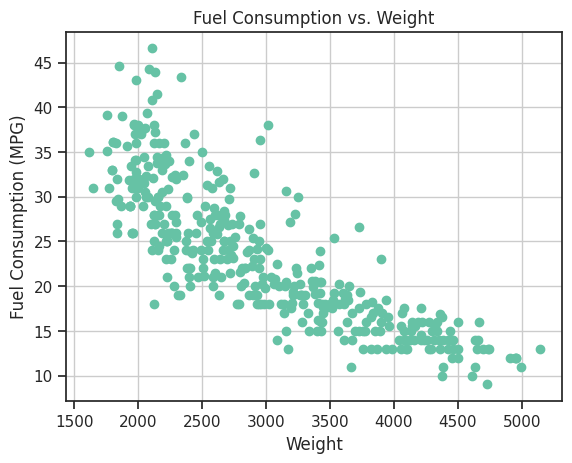

In [ ]:
# 2. Fuel consumption and weight

import pandas as pd
import matplotlib.pyplot as plt

# Create the scatter plot
plt.scatter(data['weight'], data['mpg'])
plt.xlabel("Weight")
plt.ylabel("Fuel Consumption (MPG)")
plt.title("Fuel Consumption vs. Weight")
plt.grid(True)
plt.show()

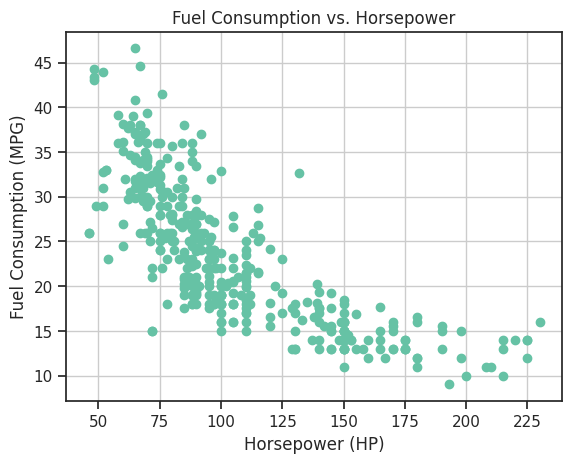

In [ ]:
# 3. Fuel consumption and horsepower (HP)

import pandas as pd
import matplotlib.pyplot as plt

# Create the scatter plot
plt.scatter(data['horsepower'], data['mpg'])
plt.xlabel("Horsepower (HP)")
plt.ylabel("Fuel Consumption (MPG)")
plt.title("Fuel Consumption vs. Horsepower")
plt.grid(True)
plt.show()

---------------------
### Hypotheses H4 and H5
At this point, we will formulate two hypotheses that should be confirmed or refuted based on the data:

- H4: fuel efficiency improved over the years represented in this dataset (i.e., 1970 through 1982).
- H5: Japanese cars (within the same time frame) are more fuel efficient than American or European ones.



### 2.3 Your turn! (20-26 points)

Write Python code to produce (box)plots that should provide good answers to the hypotheses H4 and H5 above (and some text to explain whether they were confirmed or not).

**Weight**: 20 pts, i.e., 10 pts per hypothesis.
Up to 6 bonus points for insightful additional hypotheses, code, and/or comments.

Hint:

``data['Country_code'] = data.origin.replace([1,2,3],['USA','Europe','Japan'])``



<Figure size 1000x600 with 0 Axes>

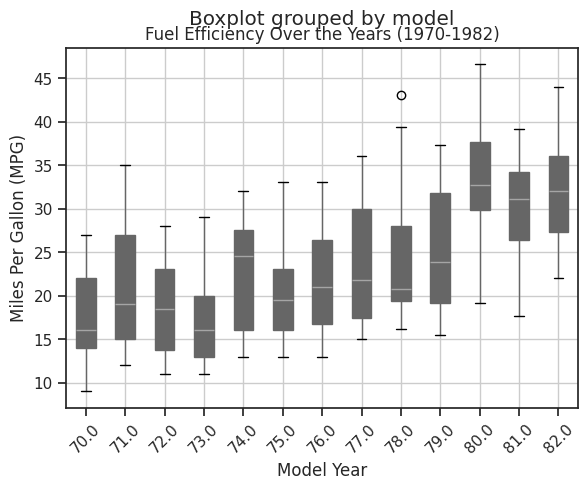

From the data given, fuel efficiency generally improved over the years.


In [ ]:
#H4: fuel efficiency improved over the years represented in this dataset (i.e., 1970 through 1982)
# I referred to the other examples above for the plot format and used the built in AI to assist me for clarification.

# Create the box plot
plt.figure(figsize=(10, 6))
data.boxplot(column='mpg', by='model', patch_artist=True) # I know this line of code is creating the box plot using the df
plt.title('Fuel Efficiency Over the Years (1970-1982)')
plt.xlabel('Model Year')
plt.ylabel('Miles Per Gallon (MPG)')
plt.xticks(rotation=45)
plt.show()

# Analyze the trend in median MPG over time
median_mpg_by_year = data.groupby('model')['mpg'].median()
if median_mpg_by_year.iloc[-1] > median_mpg_by_year.iloc[0]:  # Compare last year to first year
    print("From the data given, fuel efficiency generally improved over the years.")
else:
    print("From the data given, fuel efficiency did not generally improve over the years.")

<Figure size 800x600 with 0 Axes>

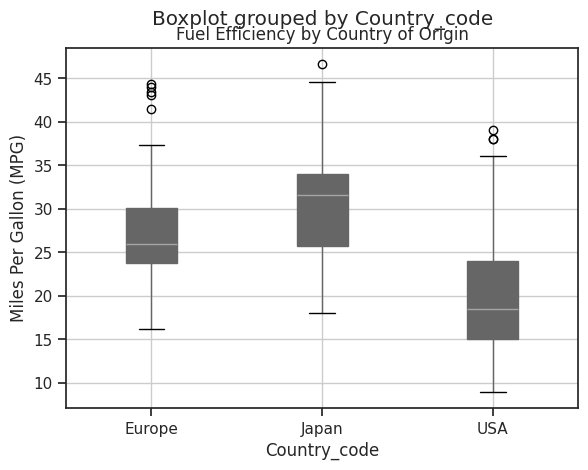

H5 Supported: Japanese cars generally have higher fuel efficiency.


In [ ]:
#H5: Japanese cars (within the same time frame) are more fuel efficient than American or European ones.
# I referred to the other examples above for the plot format and used the built in AI to assist me for clarification.

# Add Country_code column
data['Country_code'] = data.origin.replace([1, 2, 3], ['USA', 'Europe', 'Japan'])

# H5: Japanese cars are more fuel-efficient
plt.figure(figsize=(8, 6))
data.boxplot(column='mpg', by='Country_code', patch_artist=True)
plt.title('Fuel Efficiency by Country of Origin')
plt.ylabel('Miles Per Gallon (MPG)')
plt.show()

# Check if Japanese cars have higher median MPG
median_mpg_by_country = data.groupby('Country_code')['mpg'].median()
if median_mpg_by_country['Japan'] > median_mpg_by_country['USA'] and \
   median_mpg_by_country['Japan'] > median_mpg_by_country['Europe']:
    print("H5 Supported: Japanese cars generally have higher fuel efficiency.")
else:
    print("H5 Not Supported: Japanese cars do not have consistently higher fuel efficiency.")

*Enter your text*

### Conclusions (16 points)

Write your conclusions and make sure to address the issues below:
- What have you learned from this assignment?
- Which parts were the most fun, time-consuming, enlightening, tedious?
- What would you do if you had an additional week to work on this?

In [ ]:
# What have you learned from this assignment?
print("From this assingment I have learned how to use Python libraries like Pandass and Matplotlib for data analysis and visualization")
print("From this assingment I also learned how to load, clean, and manipulate datasets using Pandas Df")
print("From this assingment I also learned how to create various plots")
print("From this assingment I was able to calculate the mean, median, and average")

#Which parts were the most fun, time-consuming, enlightening, tedious?
print("I enjoyed turning the data in to plots since thats something i've never done before, the most time-consuming part was understanding the data and manipulating it since this is my first Python project for awhile I had used some AI to explain specific lines of code to give me a better understanding what i'm working with and what it means, what I found to be most tedious was constantly going back to the AI to explain speciifc lines of code (since i'm rusty at Python) but if I didn't I probably wouldn't of been able to finish it")

#What would you do if you had an additional week to work on this?




From this assingment I have learned how to use Python libraries like Pandass and Matplotlib for data analysis and visualization
From this assingment I also learned how to load, clean, and manipulate datasets using Pandas Df
From this assingment I also learned how to create various plots
From this assingment I was able to calculate the mean, median, and average
I enjoyed turning the data in to plots since thats something i've never done before, the most time-consuming part was understanding the data and manipulating it since this is my first Python project for awhile I had used some AI to explain specific lines of code to give me a better understanding what i'm working with and what it means, what I found to be most tedious was constantly going back to the AI to explain speciifc lines of code (since i'm rusty at Python) but if I didn't I probably wouldn't of been able to finish it


In [ ]:
print("""

What I learned:
- From this assingment I have learned how to use Python libraries like Pandass and Matplotlib for data analysis and visualization
- From this assingment I also learned how to load, clean, and manipulate datasets using Pandas Df
- From this assingment I also learned how to create various plots
- From this assingment I was able to calculate the mean, median, and average
----------------------------------------
Which parts were the most fun, time-consuming, enlightening, tedious?
- most fun: I enjoyed turning the data into plots since that's something i've never done before
- Time consuming: What was most time consuming for me was re teaching myself Python since it's been awhile and i'm super rusty. However, I can understand specific parts of the code but when it comes to coding from scratch I have a hard time. So i'd have to code a line of code see if it worked and if I got an error I'd ask the built-in AI to give me recommendations and explain what was wrong so I could fix the code.
- Tedious: Data transformation and cleaning
----------------------------------------
If I had an additional week:
- I would experiment more with the data and continue to go over Python basics to help me better understand the foundational concepts.
---------------------------------------
Conclusion: At first I was stumped, nervous, stressed on how I would complete this but with the assistance of AI to explain lines of code that I didn't understand it helped me progress through this assingment and give me a better understanding of why the code was needed. I will be honest certain syntax still throws me off, but I feel like now I could explain better than I could before. In the end it encourages me more to want to figure out coding, I even asked a couple friends to set aside some time to possibly start a coding night where we'd try to learn and create something.
""")




What I learned:
- From this assingment I have learned how to use Python libraries like Pandass and Matplotlib for data analysis and visualization
- From this assingment I also learned how to load, clean, and manipulate datasets using Pandas Df
- From this assingment I also learned how to create various plots
- From this assingment I was able to calculate the mean, median, and average
----------------------------------------
Which parts were the most fun, time-consuming, enlightening, tedious?
- most fun: I enjoyed turning the data into plots since that's something i've never done before
- Time consuming: What was most time consuming for me was re teaching myself Python since it's been awhile and i'm super rusty. However, I can understand specific parts of the code but when it comes to coding from scratch I have a hard time. So i'd have to code a line of code see if it worked and if I got an error I'd ask the built-in AI to give me recommendations and explain what was wrong so I could